In [229]:
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
from sklearn.mixture import GaussianMixture
from scipy.optimize import curve_fit
from pybaselines import Baseline
from pybaselines.utils import gaussian
from lmfit import Parameters, Minimizer
from lmfit.models import LorentzianModel,ConstantModel, GaussianModel

In [230]:
# Uploading the test data set

data = pd.read_csv("data/data_t1m.csv", comment='#',sep=',')
data.head()

,Size in nt in L1,Grey Values
0,120.970000,9583.214
1,120.760747,9639.429
2,120.551856,9741.571
3,120.343327,9792.357
4,120.135158,9878.357


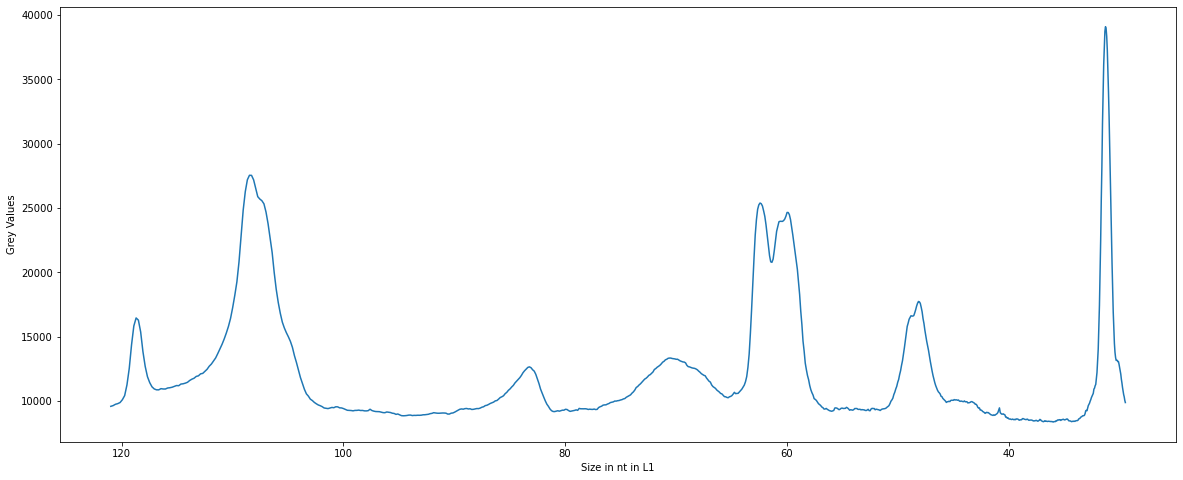

In [231]:
# Plotting the initial data

plt.figure(figsize=(20, 8))
plot = plt.plot(data['Size in nt in L1'], data['Grey Values'])
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

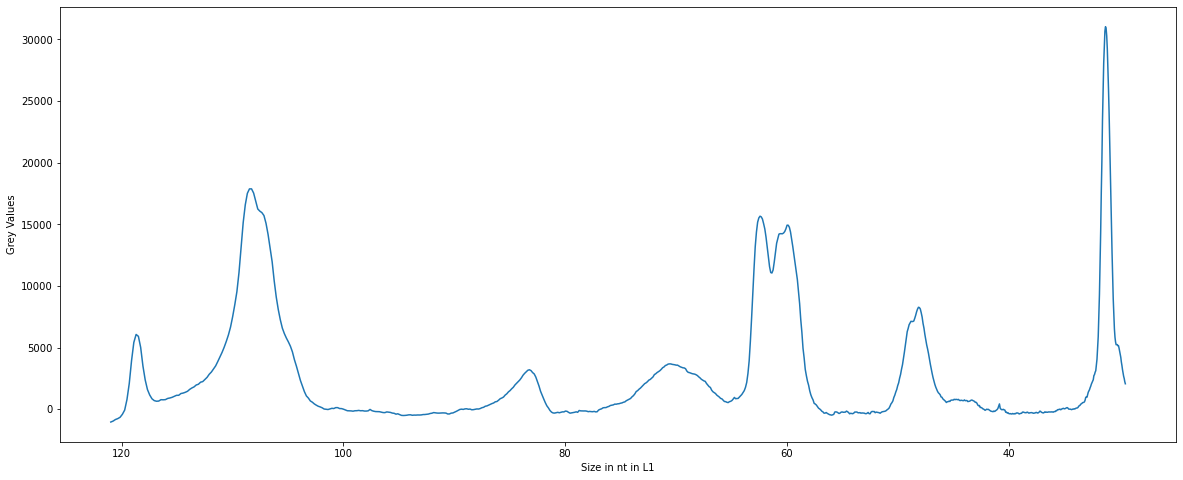

In [232]:
# Baseline removal

baseline_fitter = Baseline(x_data=data['Size in nt in L1'])
imodpoly = baseline_fitter.imodpoly(data['Grey Values'], poly_order=3, num_std=0.8)

#with baseline removed

new_y = data['Grey Values']-imodpoly[0]
plt.figure(figsize=(20, 8))
initial_plot = plt.plot(data['Size in nt in L1'], new_y)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

In [233]:
#Creating a new dataframe with new grey values

data1 = data['Size in nt in L1']
data_grey = new_y.to_frame(name="Grey Values")
df = pd.concat([data1, data_grey], axis=1)

#converting negative values to 0 → for plotting bar charts (histograms)
df[df < 0] = 0

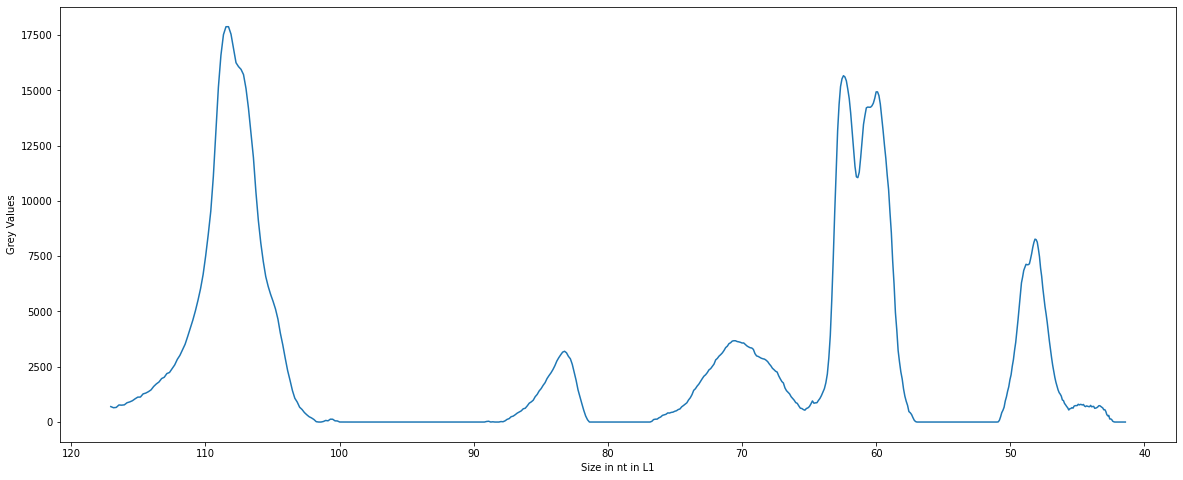

In [234]:
# Cutting off the markers:

cut_data=df[19:620]
plt.figure(figsize=(20, 8))
plot = plt.plot(cut_data['Size in nt in L1'], cut_data['Grey Values'])
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

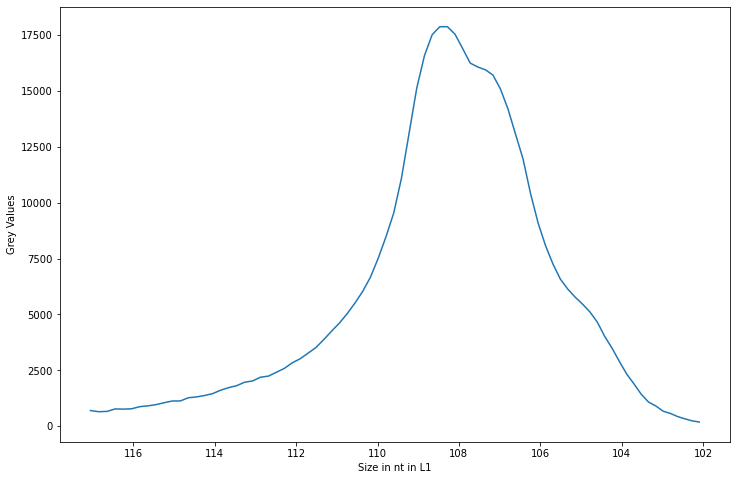

In [235]:
# Peak for analysis

peak1=cut_data[0:80]
plt.figure(figsize=(12, 8))
plot = plt.plot(peak1['Size in nt in L1'], peak1['Grey Values'])
#plt.fill_between(peak1['Size in nt in L1'], peak1['Grey Values'], color='yellow', alpha=0.3)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1")
plt.ylabel("Grey Values")
plt.show()

In [180]:
# Initiating the model

model=ConstantModel()
params=model.make_params()

# Setting a constant as the background

params['c'].set(108,min=0, max=17500)

In [181]:
# Fitting the data based on the Lorentizian model with no sd given

f1=LorentzianModel(prefix='f1_') #108
f2=LorentzianModel(prefix='f2_') #107
f3=LorentzianModel(prefix='f3_') #105
f4=LorentzianModel(prefix='f4_') #104

# Making guesses
p1=f1.make_params()
p1['f1_center'].set(108,min=102, max=116)
p1['f1_amplitude'].set(17000,min=0)

p2=f2.make_params()
p2['f2_center'].set(107,min=102, max=116)
p2['f2_amplitude'].set(15000,min=0)

p3=f3.make_params()
p3['f3_center'].set(105,min=102, max=116)
p3['f3_amplitude'].set(5000,min=0)

p4=f4.make_params()
p4['f4_center'].set(104,min=102, max=116)
p4['f4_amplitude'].set(3000,min=0)

In [182]:
# Making a compound model of all possible variations

model = model+f1+f2+f3+f4
params.update(p1)
params.update(p2)
params.update(p3)
params.update(p4)

name,value,initial value,min,max,vary,expression
c,108.000000,108,0.00000000,17500.0000,True,
f1_amplitude,17000.0000,17000,0.00000000,inf,True,
f1_center,108.000000,108,102.000000,116.000000,True,
f1_sigma,1.00000000,None,0.00000000,inf,True,
f1_fwhm,2.00000000,None,-inf,inf,False,2.0000000*f1_sigma
f1_height,5411.26830,None,-inf,inf,False,"0.3183099*f1_amplitude/max(1e-15, f1_sigma)"
f2_amplitude,15000.0000,15000,0.00000000,inf,True,
f2_center,107.000000,107,102.000000,116.000000,True,
f2_sigma,1.00000000,None,0.00000000,inf,True,
f2_fwhm,2.00000000,None,-inf,inf,False,2.0000000*f2_sigma


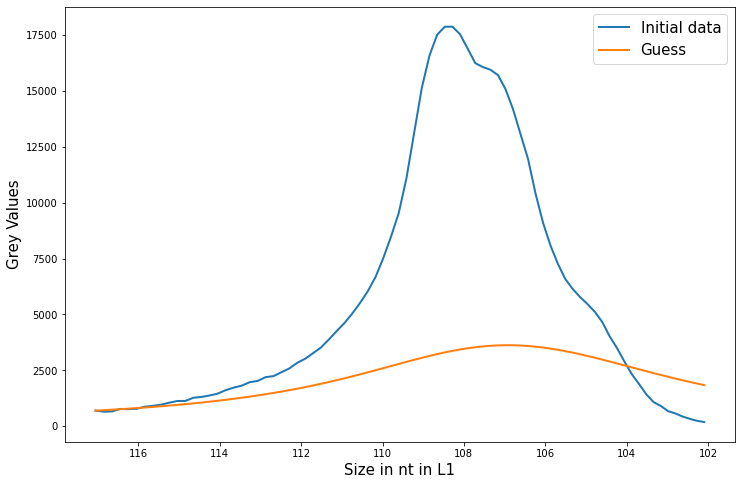

In [211]:
# The initial guess

plt.figure(figsize=(12, 8))
plot = plt.plot(peak1['Size in nt in L1'], peak1['Grey Values'], label='Initial data', linewidth=2)
init = model.eval(params = params, x = peak1['Size in nt in L1'])
plt.plot(peak1['Size in nt in L1'], init, label='Guess', linewidth=2)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1", fontsize = 15)
plt.ylabel("Grey Values", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

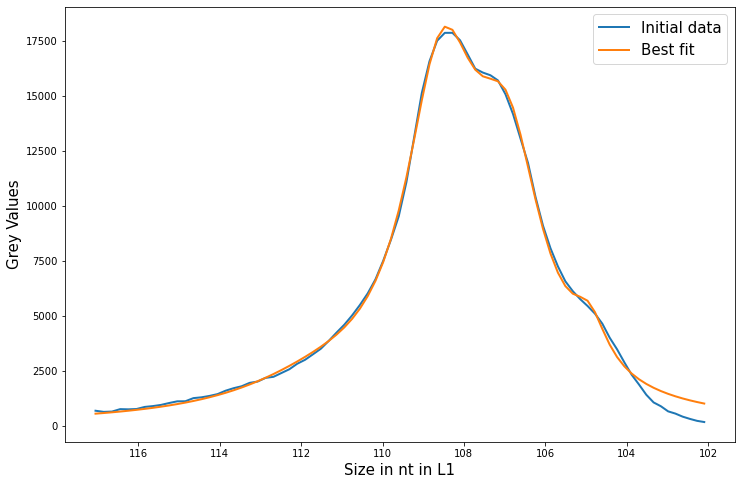

In [209]:
# The fitting

result = model.fit(data=peak1['Grey Values'], params = params, x = peak1['Size in nt in L1'])
comps = result.eval_components()

plt.figure(figsize=(12, 8))
plot = plt.plot(peak1['Size in nt in L1'], peak1['Grey Values'], label='Initial data', linewidth=2)
plt.plot(peak1['Size in nt in L1'], result.best_fit, label='Best fit', linewidth=2)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1", fontsize = 15)
plt.ylabel("Grey Values", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

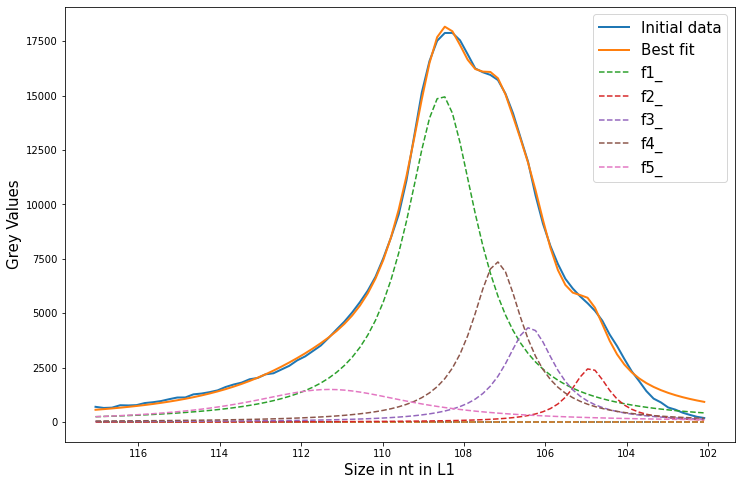

In [208]:
# The final result

plt.figure(figsize=(12, 8))
plot = plt.plot(peak1['Size in nt in L1'], peak1['Grey Values'], label='Initial data', linewidth=2)
plt.plot(peak1['Size in nt in L1'], result.best_fit, label='Best fit', linewidth=2)

# Plotting each peak (component)
for name, comp in comps.items():
    if name == "constant":
        plt.plot(peak1['Size in nt in L1'], [comp]*len(peak1['Size in nt in L1']),'--')
    else:
        plt.plot(peak1['Size in nt in L1'],comp, '--', label=name)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1", fontsize = 15)
plt.ylabel("Grey Values", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [261]:
# Initiating the model for all possible positions with sd

model1=ConstantModel()
params=model1.make_params()

# Setting a constant as the background

params['c'].set(108,min=0, max=17500)


In [262]:
sd = np.std(peak1['Size in nt in L1'])

In [263]:
# Fitting the data based on the Lorentizian model

f1=LorentzianModel(prefix='f1_') #105
f2=LorentzianModel(prefix='f2_') #106
f3=LorentzianModel(prefix='f3_') #107
f4=LorentzianModel(prefix='f4_') #108
f5=LorentzianModel(prefix='f5_') #109

p1=f1.make_params()
p1['f1_center'].set(105,min=102, max=116)
p1['f1_amplitude'].set(6000,min=0)
p1['f1_sigma'].set(sd)

p2=f2.make_params()
p2['f2_center'].set(106,min=102, max=116)
p2['f2_amplitude'].set(12000,min=0)
p2['f2_sigma'].set(sd)

p3=f3.make_params()
p3['f3_center'].set(107,min=102, max=116)
p3['f3_amplitude'].set(15000,min=0)
p3['f3_sigma'].set(sd)

p4=f4.make_params()
p4['f4_center'].set(108,min=102, max=116)
p4['f4_amplitude'].set(17800,min=0)
p4['f4_sigma'].set(sd)

p5=f5.make_params()
p5['f5_center'].set(109,min=102, max=116)
p5['f5_amplitude'].set(6000,min=0)
p5['f5_sigma'].set(sd)

In [264]:
# Making a compound model of all possible variations

model1 = model1+f1+f2+f3+f4+f5
params.update(p1)
params.update(p2)
params.update(p3)
params.update(p4)
params.update(p5)

name,value,initial value,min,max,vary,expression
c,108.000000,108,0.00000000,17500.0000,True,
f1_amplitude,6000.00000,6000,0.00000000,inf,True,
f1_center,105.000000,105,102.000000,116.000000,True,
f1_sigma,4.37325260,4.373252598331796,0.00000000,inf,True,
f1_fwhm,8.74650520,None,-inf,inf,False,2.0000000*f1_sigma
f1_height,436.713718,None,-inf,inf,False,"0.3183099*f1_amplitude/max(1e-15, f1_sigma)"
f2_amplitude,12000.0000,12000,0.00000000,inf,True,
f2_center,106.000000,106,102.000000,116.000000,True,
f2_sigma,4.37325260,4.373252598331796,0.00000000,inf,True,
f2_fwhm,8.74650520,None,-inf,inf,False,2.0000000*f2_sigma


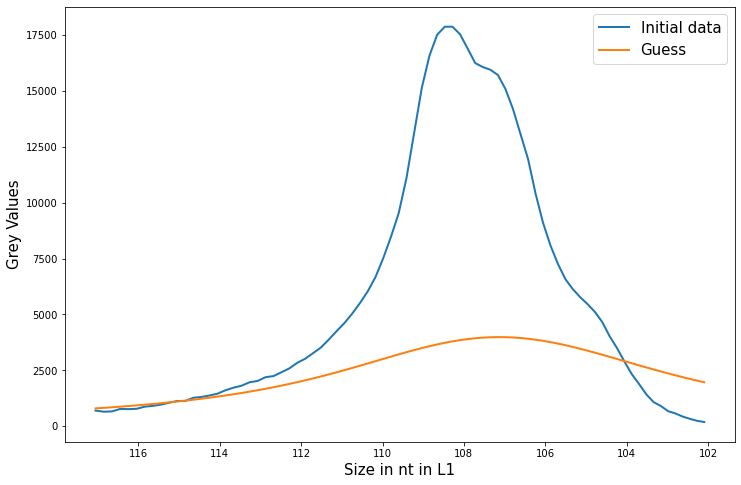

In [265]:
# The initial guess

plt.figure(figsize=(12, 8))
plot = plt.plot(peak1['Size in nt in L1'], peak1['Grey Values'], label='Initial data', linewidth=2)
init = model1.eval(params = params, x = peak1['Size in nt in L1'])
plt.plot(peak1['Size in nt in L1'], init, label='Guess', linewidth=2)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1", fontsize = 15)
plt.ylabel("Grey Values", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

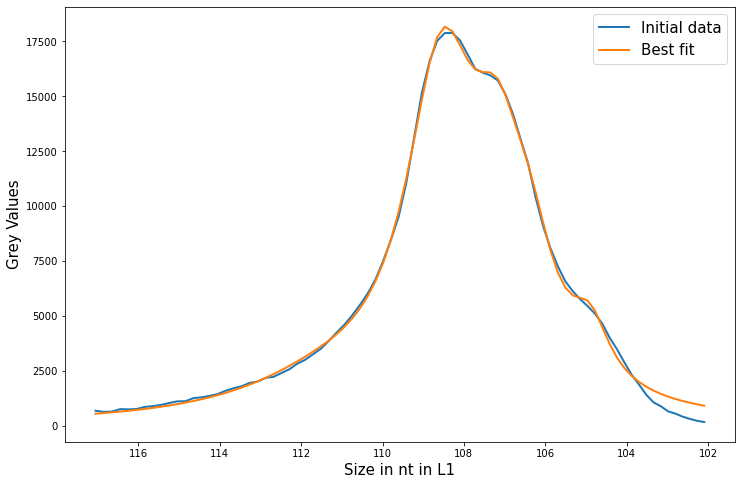

In [266]:
# The fitting

result = model1.fit(data=peak1['Grey Values'], params = params, x = peak1['Size in nt in L1'])
comps = result.eval_components()

plt.figure(figsize=(12, 8))
plot = plt.plot(peak1['Size in nt in L1'], peak1['Grey Values'], label='Initial data', linewidth=2)
plt.plot(peak1['Size in nt in L1'], result.best_fit, label='Best fit', linewidth=2)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1", fontsize = 15)
plt.ylabel("Grey Values", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

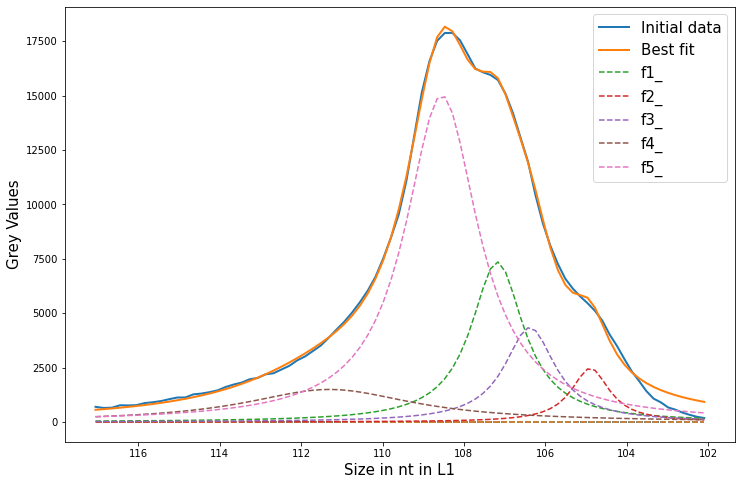

In [267]:
# The final result

plt.figure(figsize=(12, 8))
plot = plt.plot(peak1['Size in nt in L1'], peak1['Grey Values'], label='Initial data', linewidth=2)
plt.plot(peak1['Size in nt in L1'], result.best_fit, label='Best fit', linewidth=2)

# Plotting each peak (component)
for name, comp in comps.items():
    if name == "constant":
        plt.plot(peak1['Size in nt in L1'], [comp]*len(peak1['Size in nt in L1']),'--')
    else:
        plt.plot(peak1['Size in nt in L1'],comp, '--', label=name)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1", fontsize = 15)
plt.ylabel("Grey Values", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

https://lmfit.github.io/lmfit-py/builtin_models.html

In [236]:
# Initiating the model for all possible positions with sd with Gaussian

model3=ConstantModel()
params=model3.make_params()

# Setting a constant as the background

params['c'].set(108,min=0, max=17500)


In [237]:
# Fitting the data based on the Lorentizian model

f1=GaussianModel(prefix='f1_') #105
f2=GaussianModel(prefix='f2_') #106
f3=GaussianModel(prefix='f3_') #107
f4=GaussianModel(prefix='f4_') #108
f5=GaussianModel(prefix='f5_') #109

p1=f1.make_params()
p1['f1_center'].set(105,min=102, max=116)
p1['f1_amplitude'].set(6000,min=0)
p1['f1_sigma'].set(sd)

p2=f2.make_params()
p2['f2_center'].set(106,min=102, max=116)
p2['f2_amplitude'].set(12000,min=0)
p2['f2_sigma'].set(sd)

p3=f3.make_params()
p3['f3_center'].set(107,min=102, max=116)
p3['f3_amplitude'].set(15000,min=0)
p3['f3_sigma'].set(sd)

p4=f4.make_params()
p4['f4_center'].set(108,min=102, max=116)
p4['f4_amplitude'].set(17800,min=0)
p4['f4_sigma'].set(sd)

p5=f5.make_params()
p5['f5_center'].set(109,min=102, max=116)
p5['f5_amplitude'].set(8000,min=0)
p5['f5_sigma'].set(sd)

In [239]:
# Making a compound model of all possible variations

model3 = model3+f1+f2+f3+f4+f5
params.update(p1)
params.update(p2)
params.update(p3)
params.update(p4)
params.update(p5)

name,value,initial value,min,max,vary,expression
c,108.000000,108,0.00000000,17500.0000,True,
f1_amplitude,6000.00000,6000,0.00000000,inf,True,
f1_center,105.000000,105,102.000000,116.000000,True,
f1_sigma,4.37325260,4.373252598331796,0.00000000,inf,True,
f1_fwhm,10.2982227,None,-inf,inf,False,2.3548200*f1_sigma
f1_height,547.339479,None,-inf,inf,False,"0.3989423*f1_amplitude/max(1e-15, f1_sigma)"
f2_amplitude,12000.0000,12000,0.00000000,inf,True,
f2_center,106.000000,106,102.000000,116.000000,True,
f2_sigma,4.37325260,4.373252598331796,0.00000000,inf,True,
f2_fwhm,10.2982227,None,-inf,inf,False,2.3548200*f2_sigma


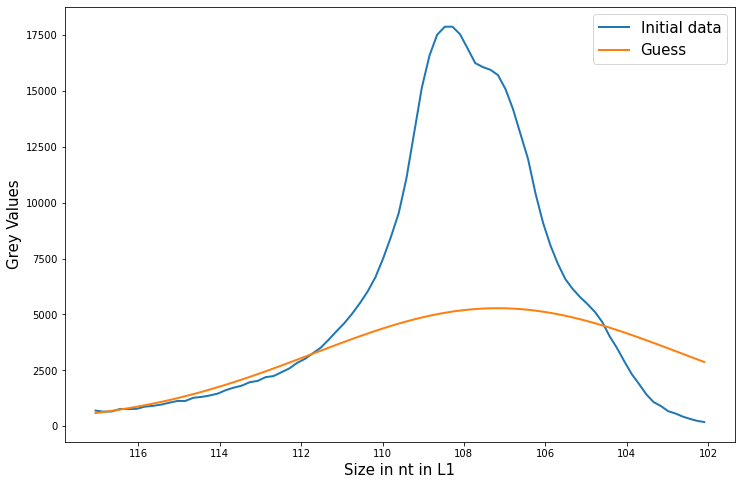

In [240]:
# The initial guess

plt.figure(figsize=(12, 8))
plot = plt.plot(peak1['Size in nt in L1'], peak1['Grey Values'], label='Initial data', linewidth=2)
init = model3.eval(params = params, x = peak1['Size in nt in L1'])
plt.plot(peak1['Size in nt in L1'], init, label='Guess', linewidth=2)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1", fontsize = 15)
plt.ylabel("Grey Values", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

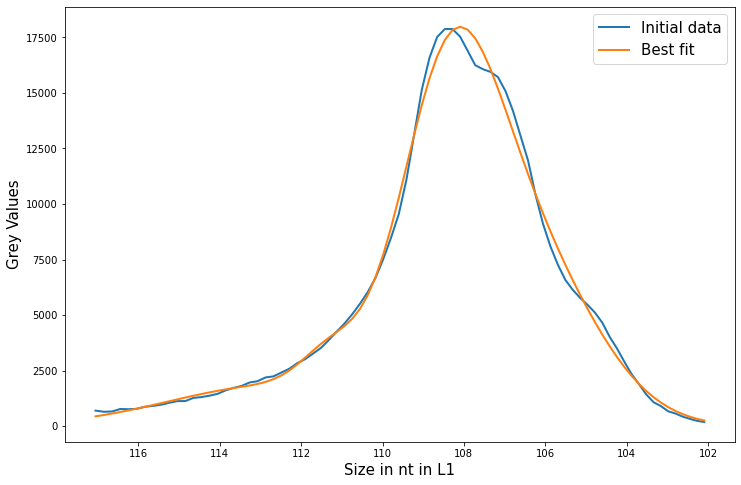

In [241]:
# The fitting

result = model3.fit(data=peak1['Grey Values'], params = params, x = peak1['Size in nt in L1'])
comps = result.eval_components()

plt.figure(figsize=(12, 8))
plot = plt.plot(peak1['Size in nt in L1'], peak1['Grey Values'], label='Initial data', linewidth=2)
plt.plot(peak1['Size in nt in L1'], result.best_fit, label='Best fit', linewidth=2)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1", fontsize = 15)
plt.ylabel("Grey Values", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

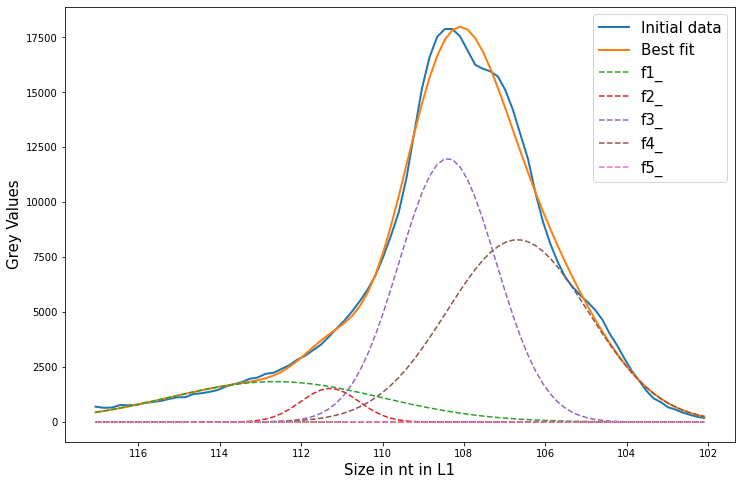

In [242]:
# The final result

plt.figure(figsize=(12, 8))
plot = plt.plot(peak1['Size in nt in L1'], peak1['Grey Values'], label='Initial data', linewidth=2)
plt.plot(peak1['Size in nt in L1'], result.best_fit, label='Best fit', linewidth=2)

# Plotting each peak (component)
for name, comp in comps.items():
    if name == "constant":
        plt.plot(peak1['Size in nt in L1'], [comp]*len(peak1['Size in nt in L1']),'--')
    else:
        plt.plot(peak1['Size in nt in L1'],comp, '--', label=name)
ax = plt.gca().invert_xaxis()
plt.xlabel("Size in nt in L1", fontsize = 15)
plt.ylabel("Grey Values", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()